<a href="https://colab.research.google.com/github/galrat/parsing/blob/main/INV2018_2022_analysis_with_lisense_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

План анализа
1.	Количество заявок по годам (ИЗ)
2.	Количество RU заявителей в общем числе
3.	Количество выданных патентов
4.	Влияние беспошлинного патентования.
5.	Скорость принятия решения по заявкам
6.	Количество экспертиз по существу на 10 тысяч заявок
7.	МПК, по которым подают заявки и выдают патенты
8.	Распределение заявок и патентов по 4 категориям
9.	Поддержание патентов в силе, кто поддерживает по категориям


In [ ]:
#!pip install stop-words

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
#from stop_words import get_stop_words
from datetime import datetime

In [ ]:
heads = ['application number', 'application url', 'INV/UM', 'filing date', 'patent number', 'patent url', 'PCT app', 'PCT publication', 'applicant', 'authors',
            'formal exam', 'substantive exam dates', 'substantive exam amount', 'refuse date', 'withdrawal date', 'grant date', 'ipc', 'claims', 'status', 'title',
           'address', 'alienation', 'license', 'pledge', 'abstract']

# patents main statistic part

In [ ]:
file_addresses = [
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv/2018INV_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv/2019INV_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv/2020INV_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv/2021INV_final_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv/2022INV_final_parsed_data.txt']

In [ ]:
file_addresses = ['/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2018INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2019INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2020INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2021INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2022INV_patent_parsed_data.txt']

In [ ]:
data_voc = {}
format = "%d.%m.%Y"
years = []
for file_address in file_addresses[:]:

  year = file_address.split('/')[-1][:4]
  print(year)
  years.append(year)

  # преобразую данные из txt в dataframe
  with open(file_address, 'r', encoding='utf-8') as file:
    content = file.readlines()

  data = []
  for line in content[:]:
    trigger = 0
    if len(line.split('\t')) != 25:
      print(len(line.split('\t')), line)
      trigger = 1
    if trigger == 0:
      data.append(line.replace('\n','').split('\t'))




  app_df = pd.DataFrame(data, columns=heads)
  app_df.drop(index=[0], inplace=True)
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')

  #app_df['filing date'] = pd.to_datetime( app_df['filing date'])
  #break


  data_voc[year] = app_df


2018


<ipython-input-145-c14175934c68>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-145-c14175934c68>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')


2019


<ipython-input-145-c14175934c68>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-145-c14175934c68>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')


2020


<ipython-input-145-c14175934c68>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-145-c14175934c68>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')


2021


<ipython-input-145-c14175934c68>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-145-c14175934c68>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')


2022


<ipython-input-145-c14175934c68>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('00.01.1900', '0')
<ipython-input-145-c14175934c68>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['substantive exam amount'] = app_df['substantive exam amount'].str.replace('01.01.1900', '1')


In [ ]:
# исправление ошибок

# 1. "no_data" in claims where claims text exists
for year in data_voc.keys():
  print(year)
  lines = []
  for line in data_voc[year]['claims']:
    if len(line) > 7 and 'no_data' in line:
      lines.append(line[7:])
    else:
      lines.append(line)
    #break
  data_voc[year]['claims'] = lines
  #break

# нет данных вместо no_data
for year in data_voc.keys():
   data_voc[year]['status'] = data_voc[year]['status'].str.replace('нет данных', 'no_data')

2018
2019
2020
2021
2022


In [ ]:
# добавляю числовой столбец -
'''
действует-0
может прекратить действие-1
не действует, но может быть восстановлен-2
не действует-3
no_data -0'''

'\nдействует-0\nможет прекратить действие-1\nне действует, но может быть восстановлен-2\nне действует-3\nno_data -0'

In [ ]:
for year in years:
  print(year)
  status_column = data_voc[year]['status']
  lines = []
  for line in status_column.values:
    status = line.split('(')[0].strip()
    #print(line, status)
    if status == 'действует':
      lines.append(1)
    elif status == 'может прекратить свое действие':
      lines.append(2)
    elif status == 'прекратил действие, но может быть восстановлен':
      lines.append(3)
    elif status == 'не действует':
      lines.append(4)
    elif status == 'no_data':
      lines.append(0)
    else:
      lines.append(0)
      print('остаток', [status], line)
  data_voc[year]['status_number'] = lines




2018
2019
2020
2021
2022


In [ ]:
for year in years:
  print(data_voc[year]['status_number'].value_counts())

1    14803
0    11768
3     7769
2     2377
4     1301
Name: status_number, dtype: int64
1    15996
0     9737
3     7767
2     2030
4       24
Name: status_number, dtype: int64
1    15620
0    11809
3     5301
2     2215
4       13
Name: status_number, dtype: int64
1    15324
0    10672
2     4119
3      682
4        4
Name: status_number, dtype: int64
1    14762
0    11980
2       47
3        1
4        1
Name: status_number, dtype: int64


# функции

In [ ]:
def app_categories(applicants, authors):
  '''
  get applicants names, authors names
  return
  - values - number of applicants in 5 types = ['no_data', 'education', 'government', 'legal', 'individual']
  - app_type_col - column with 0, 1, 2, 3, 4 which correspond to types
  - phy_app - number of autors which are applicants

  '''
  print('total documents', len(applicants))

  edu = 0 # 1
  gov = 0 # 2
  leg = 0 # 3
  phy = 0 # 4
  no_data = 0
  phy_app = 0
  app_type_col = []

  education = ['бразован', 'нститут', 'ниверс', 'ЮНИВЕРСИТИ', 'юниверсити', 'УНИВЕР', 'ИНСТИТЬЮТ', 'ИНСТИТУТ', 'ЮНИВЕРСИТЕ', 'ФГБОУ', 'ИМАШ РАН', 'ИВС РАН',
               'ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ', 'НАУЧНЫЙ ЦЕНТР', 'ГосНИИ', 'ИССЛЕДОВАТЕЛЬСКИЙ ЦЕНТР',
               'БЮДЖЕТНОЕ НАУЧНОЕ УЧРЕЖДЕНИЕ', 'научно-исследовательское учреждение', 'академия', 'образовательная организация',
               'Сколково', 'Научный центр', 'научно-практический центр', 'аучный центр', 'Фонд', 'ФНЦ',
               'аучно-технический центр', 'НАУЧНО-ПРОИЗВОДСТВЕННОЕ ОБЪЕДИНЕНИЕ', 'образовательное учреждение',
               'бразован', 'нститут', 'ниверс', 'ЮНИВЕРСИТИ', 'юниверсити', 'УНИВЕР', 'ИНСТИТЬЮТ', 'ИНСТИТУТ', 'ЮНИВЕРСИТЕ', 'ФГБОУ', 'ИМАШ РАН', 'ИВС РАН', 'учреждение науки', 'аучный центр', 'научно-производственный центр',
               'исследовательский центр', 'Научно-учебный центр', 'НАУЧНО-ОБРАЗОВАТЕЛЬНЫЙ ЦЕНТР'
               ]
  government = ['осударственн', 'министерство', 'Российская Федерация', 'государственное бюджетное учреждение', 'ФГБНУ', 'ойсковая часть', 'азенное учреждение',
                'ФБУ', 'ФГУП', 'больница',
                'Министерство', 'Росконгресс', 'Федеральное агентство', 'ФГБУ', 'Фонд поддержки', 'МИНИСТЕРСТВО',
                'БОЛЬНИЦА', 'ФЕДЕРАЛЬНОЕ КАЗЕННОЕ ПРЕДПРИЯТИЕ', 'Федеральное казенное предприятие',
                'Автономное учреждение "Технопарк - Мордовия" (RU)', 'ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ',
                'Федеральное казенное предприятие', 'ФГАУ', 'Федеральный центр', "ФКУ"]
  legal = ['ООО', 'бщество', 'ЛТД.', 'ЛИМИТЕД', 'КОРПОРЕЙШН', 'ИНК.', 'Лимитед', 'ИНКОРПОРЕЙТЕД', 'ГМБХ', 'КОНИНКЛЕЙКЕ', 'ИНТЕРНЭШНЛ', 'ФРАНС', 'ЛЛС',
           'КАЙСЯ', 'С.П.А', 'С.А.', 'ЛТД',
          ' АГ', 'СИМЕНС', 'КОМПАНИ', 'Лтд', 'КОРПОРЭЙШН', 'ЭЛЕКТРОНИКС', 'Компани', 'ОБЩЕСТВО', 'ЭлЭлСи', 'ХОЛДИНГ', 'БАСФ', 'ООО', 'ГмбХ', 'Инк.',
           'А/С', 'АКЦИЕНГЕЗЕЛЛЬШАФТ',
          'АКЦИЕНГЕЗЕЛЬШАФТ', 'С.Р.Л.', ' АБ ', 'ЛЛК', 'Акциенгезельшафт', ' СПА ', 'СОЛЮШНС', 'ЗАО', 'ПАО', 'АКТИЕНГЕЗЕЛЛЬШАФТ', 'Текнолоджиз',
          'олюшн', 'ЭлЭЛСи', 'орпорейшн', 'ГРУП', 'ДиЭмСиСи', '(ПАБЛ)', 'ЭЛЕКТРИК', 'ТЕКНОЛО', 'АО ', 'БОЛАГЕТ', 'САФРАН', ' ОЙ ', 'ОЮЙ', 'ОЙЙ',
          ' САС ', ' СА ', ' АС ', 'СОЛЮШН', ' ИНК ', ' НВ ', 'АКТИЕБОЛАГ', 'ГОБЭН', 'ИНТЕРНЕЙШНЛ', 'ЛЛЦ', 'СЕРВИС', 'ФАРМА', 'ЭЛЭЛСИ',
           'АССОЦИАЦИЯ РАЗВИТИЯ ФИНАНСОВЫХ ТЕХНОЛОГИЙ',
          'убличное акционерное', 'OOO', 'акрытого акционерного общества', 'кооператив', 'КООПЕРАТИВ',
          'Частное учреждение здравоохранения', 'с ограниченной ответсвеностью',
           'Ленинградский областной центр авиационного технического творчества', 'Ассоциация', 'кционерная организация',
           'организация', 'АССОЦИАЦИЯ', 'ЧАСТНОЕ УЧРЕЖДЕНИЕ', 'астное учреждение', 'АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ',
           'Союз']
  physic = [' оглы', 'анович ', 'СЕРГЕ', 'ВЛАДИМИР', 'ЕВИЧ ', 'ОВИЧ ', 'Чон-Ын', 'ЦЗИНЬ, ГЭ', 'Цой Валентин',
            'Хамама Зина (RU)', 'Федан Дмитрий (RU)', 'Мд. Анварул Азим (RU)', 'Перцовский Давид (RU)', 'Цой ',
            'Дорошенко Джассер', 'Шахин Махмуд']
            #'Оденцов В.А.','Абрамов Б.Н.',]


  others = []
  counter = 0
  for ap, au in zip(applicants, authors):
    counter += 1
    #print(counter, 'applicants, authors', ap, au)
    if ap == 'no_data':
      no_data += 1
      app_type_col.append(0)
      continue

    if ap == au:
      #print('ap == au')
      phy += 1
      phy_app += 1
      app_type_col.append(4)
      continue

    if sum([x in ap for x in legal]):
      #print('leg')
      leg += 1
      app_type_col.append(3)
      continue

    if sum([x in ap for x in education]):
      #print('educ')
      edu += 1
      app_type_col.append(1)
      continue

    if sum([x in ap for x in government]):
      #print('gov')
      gov += 1
      app_type_col.append(2)
      continue

    if sum([x in ap for x in physic]):
      #print('physic')
      phy += 1
      app_type_col.append(4)
      continue

    # БОЛЬШАЯмаленькие пробел БОЛЬШАЯмаленькие пробел БОЛЬШАЯмаленькие
    name_pattern = r'[А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+'
    if len(re.findall(name_pattern, ap)) != 0:
      phy += 1
      app_type_col.append(4)
      continue

    # БОЛЬШАЯ ФАМИЛИЯ маленькое имя
    name_pattern = r'[А-ЯЁ]+ [А-ЯЁ][а-яё]+'
    if len(re.findall(name_pattern, ap)) != 0:
      phy += 1
      app_type_col.append(4)
      continue

    # Фамилия И.О.
    ap = ap.replace(' .', '').replace('.', '')
    name_pattern = r'[А-ЯЁ][а-яё]+\s[А-ЯЁ][А-ЯЁ]'
    if len(re.findall(name_pattern, ap)) != 0:
      phy += 1
      app_type_col.append(4)
      continue

        # всякие исключения
    if 'Мешенгиссер Юрий' in ap or 'Газимиев Магомед-Салах Алхазурович' in ap or 'НАСЫРОВА НАДЕЖДА ИГОРЕВНА' in ap or ap in 'Саламех Али':
      phy += 1
      app_type_col.append(4)
      continue
            # всякие исключения
    if 'Саламех Али' in ap or 'Ван Сяолун' in ap or 'Фаизова Алина' in ap or 'Халиков Хашимбек' in ap:
      phy += 1
      app_type_col.append(4)
      continue

    others.append(ap)
    app_type_col.append(0)


    #print()
    #break
  #print('app_type_col', app_type_col)
  if len(others):
    print('количество оставшихся', len(others)) # почти 100%, что все others - это коммерческ.ческ.
    print('оставшиеся', others)
    for other in others:
      print('others', other)
  if len(applicants) != no_data + edu + gov + leg + phy + len(others):
    print('sum check', no_data + edu + gov + leg + phy + len(others))
  #print('количество авторов одновременно и заявителей:', phy_app)


  data = {}
  values = [no_data, edu, gov, leg, phy]
  types = ['no_data', 'education', 'government', 'legal', 'individual']
  for value, key in zip(values, types):
    data[key] = value


  return values, app_type_col, phy_app

# 1. Анализ актуальной статистики патентной активности в Российской Федерации
## Аннотация
В статье представлен анализ патентной активности в Российской Федерации за 2018-2022 года. Анализ выполнен на основе открытых данных, публикуемых Роспатентом. Целью настоящей работы являлось определение динамики патентной активности разными типами заявителей (государственные учреждения, образователные учреждения, коммерческие организации, физические лица), выявление лидеров в патентовании, выявление областей, в которых патенты наиболее эффективно используются. Анализ произведен только в отношении патентов на изобретения. Выявлено значительное снижение количества подаваемых патентов, как российскими, так и зарубежными заявителями; значительное количество не поддерживаемых в силе патентов; низкий уровень зарегистрированных распоряжений интеллектуальными правами.

## Years dynamic

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

подача заявок по годам 
       кол-во
2018   38018
2019   35554
2020   34958
2021   30801
2022   26791


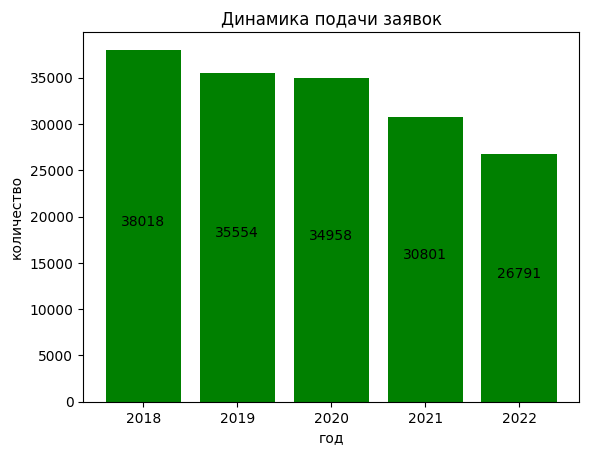

In [ ]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  year_total.append(len(data_voc[year]['filing date']))
print('подача заявок по годам', '\n', pd.DataFrame(year_total, index=years, columns=['кол-во']))
plt.bar(years, year_total, color='g')
plt.xlabel('год')
plt.ylabel('количество')
plt.title('Динамика подачи заявок')
addlabels(years, year_total)
plt.show()

app_per_year = year_total


Мне стало интересно посмотреть динамику подачи не только по годам, но и по месяцам. Оказалось, что год от года наблюдается одна и та же картина: минимум в январе, волнообразный спад с марта по сентябрь и ударный рост с сентября по декабрь.
Предполагаю, что в коротком явнваре люди отдыхают и отходят от ударного завершения года, до мая набирают темп подачи, в празничном мае снова отдыхают, еще два месяца изобретают, после чего следует ежегодный августо-сентябрьский провал (возможно, он объясняется отпусками), ну а пик подачи от года к году в декабре. Исходя из моего опыта работы в бюджетных учерждениях, скорее всего, во многом это они выполняют годовые планы по подаче заявок.

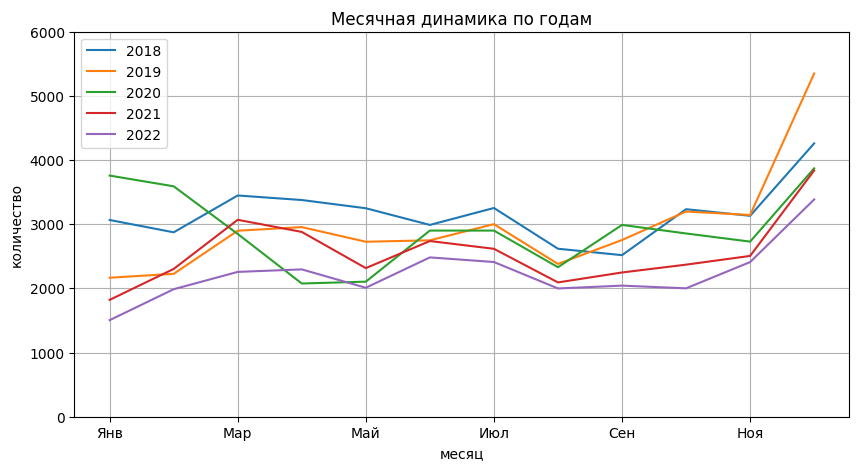

In [ ]:

each_year_month_dynamic = []
for year in data_voc.keys():
  moth_dynamic = []
  filing_dates = []
  for filing_date in data_voc[year]['filing date']:
    if filing_date != 'no_data' and filing_date != '':
      filing_dates.append(int(filing_date.split('.')[1]))

  for month in range(1, 13):
    moth_dynamic.append(filing_dates.count(month))
  each_year_month_dynamic += [moth_dynamic]

months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
each_year_month_dynamic_df = pd.DataFrame(np.transpose(each_year_month_dynamic), columns=years)

each_year_month_dynamic_df['months'] = months_names
each_year_month_dynamic_df.plot(x='months', y = years, figsize=(10, 5), grid=True, yticks=[i*1000 for i in range(np.amax(each_year_month_dynamic)//1000+2)], title='Месячная динамика по годам', xlabel='месяц')
plt.ylabel('количество')
plt.show()



Посмотрим сколько российских правообладателей в общем числе выданных патентов.
На рисунке 2 серый столбец показывает заявки, по которым нет данных, так как по ПМ публикуются только патенты, но не сами заявки, и только патенты содержат эти данные.
Доля зарубежных правообладателей ничтожно мала и за 5 лет уменьшилась в 4 раза (примерно с 400 до примерно 100).

## RU not RU

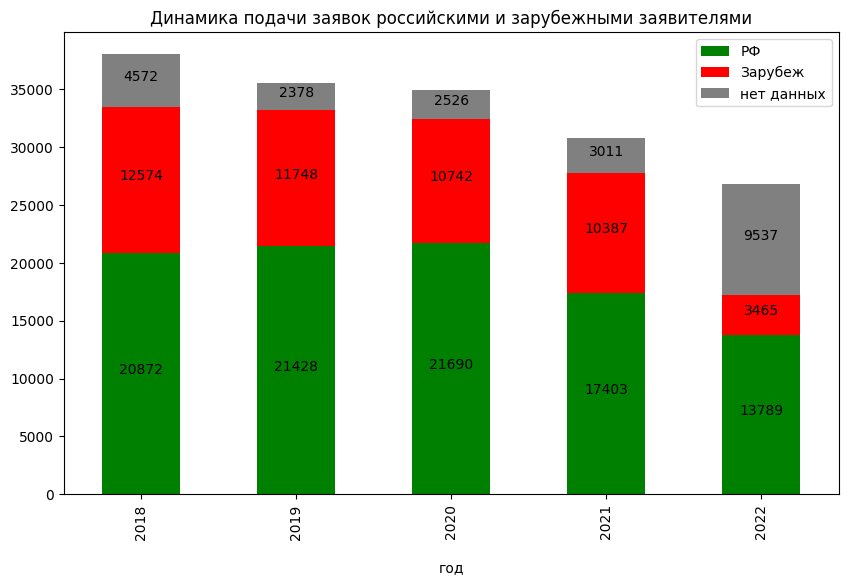

In [ ]:
# количество RU и не RU заявителей

app_ru = []
app_not_ru = []
app_no_country = []
regex_country = r'(\([A-Z]{2}\))'

for df in data_voc.values():
  ru, not_ru, no_country = 0, 0, 0
  for app in df['applicant']:
    if 'RU' in app:
      ru += 1
    elif len(re.findall(regex_country, app)) != 0: # если нет двух заглавных букв в круглых скобках, то нет данных о стране заявителя
      not_ru += 1
    else:
      no_country += 1
  app_ru.append(ru)
  app_not_ru.append(not_ru)
  app_no_country.append(no_country)
columns = ['РФ', 'Зарубеж', 'нет данных']
applicants_df = pd.DataFrame(np.transpose([app_ru, app_not_ru, app_no_country]), columns=columns)
applicants_df['год'] = years
ax = applicants_df.plot(x='год', y=columns, kind='bar', stacked=True, title='Динамика подачи заявок российскими и зарубежными заявителями', color=['green', 'red', 'grey'], figsize=(10, 6), xlabel='\nгод', table=False)
#ax = applicants_df.plot(x='год', y=columns, kind='bar', stacked=True, title='Динамика подачи RU-(не RU) заявителями', color=['green', 'red', 'grey'], figsize=(10, 6), xlabel='\nгод', table=False)

for i in range(len(years)):
  total = 0
  for value in columns:
    plt.text(i, applicants_df[value].loc[i]*0.5 + total, applicants_df[value].loc[i], ha = 'center')
    total += applicants_df[value].loc[i]
plt.show()



In [ ]:
applicants_df[['РФ', 'Зарубеж']].to_numpy()

array([[20872, 12574],
       [21428, 11748],
       [21690, 10742],
       [17403, 10387],
       [13789,  3465]])

         РФ   Зарубеж  нет данных years
0  0.772901  0.804756    0.000656  2018
1  0.774687  0.784304    0.002103  2019
2  0.719087  0.702756    0.001188  2020
3  0.866230  0.486377    0.000996  2021
4  0.945174  0.512266    0.000419  2022


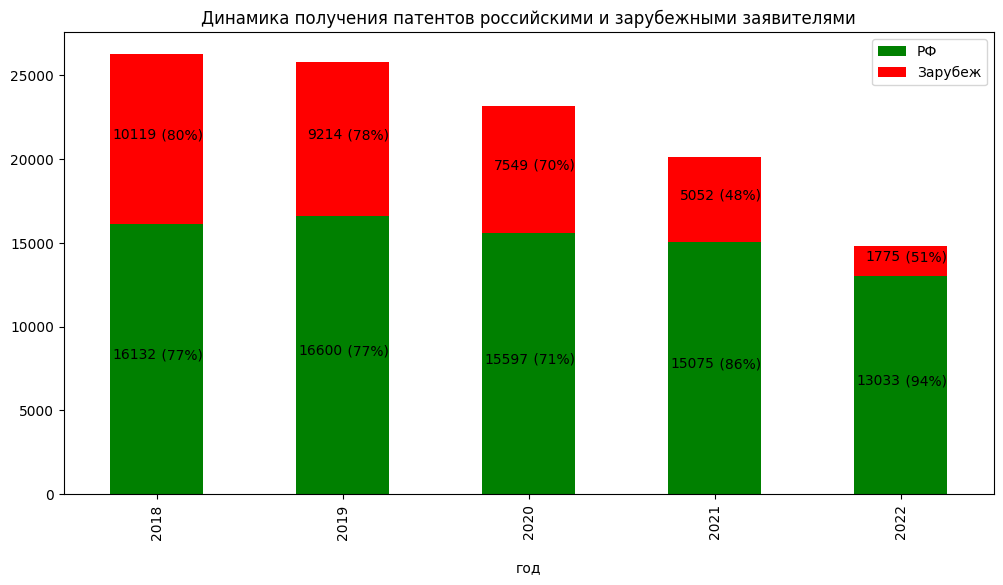

In [ ]:
# количество RU и не RU патентообладателей
need_to_reparse = []
app_ru = []
app_not_ru = []
app_no_country = []
regex_country = r'(\([A-Z]{2}\))'

for df in data_voc.values():
  #print(df)
  ru, not_ru, no_country = 0, 0, 0
  counter = 0
  for app in df[df['patent number'] != 'no_data'].values:
    #print(app[8])
    #break
    if 'RU' in app[8]:
      ru += 1
    elif len(re.findall(regex_country, app[8])) != 0: # нахожу не(RU), если нет двух заглавных букв в круглых скобках, то нет данных о стране заявителя
      not_ru += 1
    else:
      no_country += 1
      #print(app)
      need_to_reparse.append(app)
    counter += 1
  print('=====================================')
  #break
  app_ru.append(ru)
  app_not_ru.append(not_ru)
  app_no_country.append(no_country)
columns = ['РФ', 'Зарубеж', 'нет данных']
patents_df = pd.DataFrame(np.transpose([app_ru, app_not_ru, app_no_country]), columns=columns)
patents_df['год'] = years
persent_patent_application = patents_df[['РФ', 'Зарубеж']].to_numpy()/applicants_df[['РФ', 'Зарубеж']].to_numpy()*100
persent_patent_application_df = pd.DataFrame(persent_patent_application, columns=['РФ', 'Зарубеж'])

ax = patents_df.plot(x='год', y=columns[:2], kind='bar', stacked=True, title='Динамика получения патентов российскими и зарубежными заявителями', color=['green', 'red', 'grey'], figsize=(12, 6), xlabel='\nгод', table=False)
#ax = applicants_df.plot(x='год', y=columns, kind='bar', stacked=True, title='Динамика подачи RU-(не RU) заявителями', color=['green', 'red', 'grey'], figsize=(10, 6), xlabel='\nгод', table=False)

persent_df = pd.DataFrame(patents_df[['РФ', 'Зарубеж', 'нет данных']].to_numpy()/applicants_df[['РФ', 'Зарубеж', 'нет данных']].to_numpy(), columns=['РФ', 'Зарубеж', 'нет данных'])
persent_df['years'] = years
print(persent_df)

for i in range(len(years)):
  total = 0
  for value in columns[:2]:
    plt.text(i, patents_df[value].loc[i]*0.5 + total, patents_df[value].loc[i], ha = 'right')
    plt.text(i, patents_df[value].loc[i]*0.5 - 0 + total, ' (' + str(int(float(persent_patent_application_df[value].loc[i])))+"%)", ha = 'left')
    total += patents_df[value].loc[i]
plt.show()

In [ ]:
persent_df

,РФ,Зарубеж,нет данных,years
0,0.772901,0.804756,0.000656,2018
1,0.774687,0.784304,0.002103,2019
2,0.719087,0.702756,0.001188,2020
3,0.866230,0.486377,0.000996,2021
4,0.945174,0.512266,0.000419,2022


In [ ]:
pd.DataFrame(need_to_reparse, columns=data_voc['2018'].columns).to_csv('reparse.csv')

## Рассмотрим типы заявителей
Из рисунка видно, что лидерами по получению патентов являются коммерческ. и образовательные организации, далее с небольшим отставанием следуют физлица, доля госучреждений несоизмеримо меньше.
Из интересного:
1. Доля заявок по которым не был выдан патент на ПМ растет, пик приходится на 2021 год. С учетом того, что делопроизводство по ПМ достаточно быстрое, то данные могут быть неполными только для заявок второй половины 2022 года.
2. Хуже всех динамика получения патентов у физлиц.


In [ ]:
# оставляю только RU заявителей
data_voc_ru = {}
ru_applicants = []
for year in data_voc.keys():
  print(year)
  print(len(data_voc[year]))
  data_voc_ru[year] = data_voc[year][data_voc[year]['applicant'].str.contains('RU')]
  print(len(data_voc_ru[year]))
  print()
  ru_applicants.append(len(data_voc_ru[year]))

2018
38018
20872

2019
35554
21428

2020
34958
21690

2021
30801
17403

2022
26791
13789



In [ ]:
ru_applicants = [ru_applicants for i in range(4)]
pd.DataFrame(ru_applicants).transpose()

,0,1,2,3
0,20872,20872,20872,20872
1,21428,21428,21428,21428
2,21690,21690,21690,21690
3,17403,17403,17403,17403
4,13789,13789,13789,13789


2018
total documents 20872
данные по категориям [0, 7478, 559, 5180, 7655]
количество авторов=заявителей 6677
20872 20872
2019
total documents 21428
данные по категориям [0, 7588, 572, 5348, 7920]
количество авторов=заявителей 6738
21428 21428
2020
total documents 21690
данные по категориям [0, 7182, 512, 5427, 8569]
количество авторов=заявителей 7465
21690 21690
2021
total documents 17403
данные по категориям [0, 7551, 469, 5276, 4107]
количество авторов=заявителей 3086
17403 17403
2022
total documents 13789
данные по категориям [0, 6781, 373, 3990, 2645]
количество авторов=заявителей 2019
13789 13789
   образование и наука  государство  коммерческ.  физлица years
0                 7478          559         5180     7655  2018
1                 7588          572         5348     7920  2019
2                 7182          512         5427     8569  2020
3                 7551          469         5276     4107  2021
4                 6781          373         3990     2645  2022


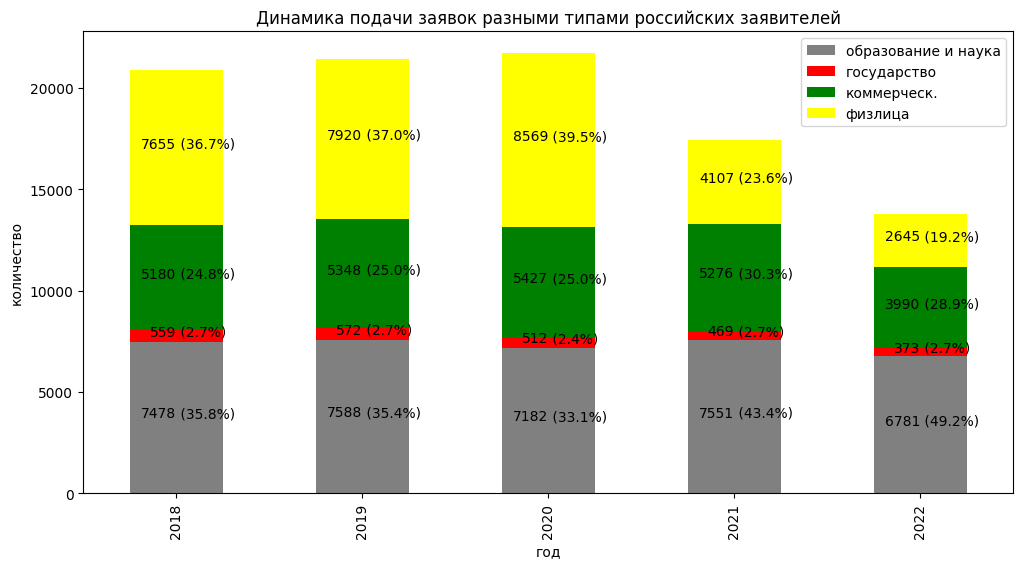

In [ ]:
# типы заявителей
types = ['no_data', 'education', 'government', 'legal', 'individual']
types = ['нет данных', 'образование и наука', 'государство', 'коммерческ.', 'физлица']
app_types_data = []
for year in data_voc_ru.keys():
  print(year)
  year_data = app_categories((data_voc_ru[year]['applicant'].values[:]), (data_voc_ru[year]['authors'].values[:]))
  print('данные по категориям', year_data[0])
  print('количество авторов=заявителей', year_data[2])
  print(len( data_voc_ru[year]['application number']), len(year_data[1]))
  #data_voc_ru[year].loc[:, "applicant type"] = year_data[1]
  try:
    data_voc_ru[year].insert(0, "applicant type", year_data[1])
  except:
    print('already exist')
  app_types_data.append(year_data[0])
app_types_df = pd.DataFrame(app_types_data, columns=types)
app_types_df['years'] = years
try:
  app_types_df.drop(['нет данных'], axis=1, inplace=True)
except:
  nothing = 1

persent_app_to_total_app = app_types_df[['образование и наука',	'государство',	'коммерческ.',	'физлица'	]].to_numpy()/pd.DataFrame(ru_applicants).transpose().to_numpy()*100
persent_app_to_total_app_df = pd.DataFrame(persent_app_to_total_app, columns=['образование и наука',	'государство',	'коммерческ.',	'физлица'	])

app_types_df.plot(x='years', y=types[1:], kind='bar', figsize=(12, 6), xlabel='год', ylabel='количество', title='Динамика подачи заявок разными типами российских заявителей', color = ['grey', 'red', 'green', 'yellow'], stacked=True)
print(app_types_df)
for i in range(len(years)):
  total = 0
  for value in types[1:]:
    plt.text(i, app_types_df[value].loc[i]*0.5 + total, app_types_df[value].loc[i], ha = 'right')
    plt.text(i, app_types_df[value].loc[i]*0.5 + total, ' ('+str(round(persent_app_to_total_app_df[value].loc[i], 1))+'%)   ', ha = 'left')
    total += app_types_df[value].loc[i]
plt.show()


   образование и наука  государство  коммерческ.  физлица years
0                 7478          559         5180     7655  2018
1                 7588          572         5348     7920  2019
2                 7182          512         5427     8569  2020
3                 7551          469         5276     4107  2021
4                 6781          373         3990     2645  2022


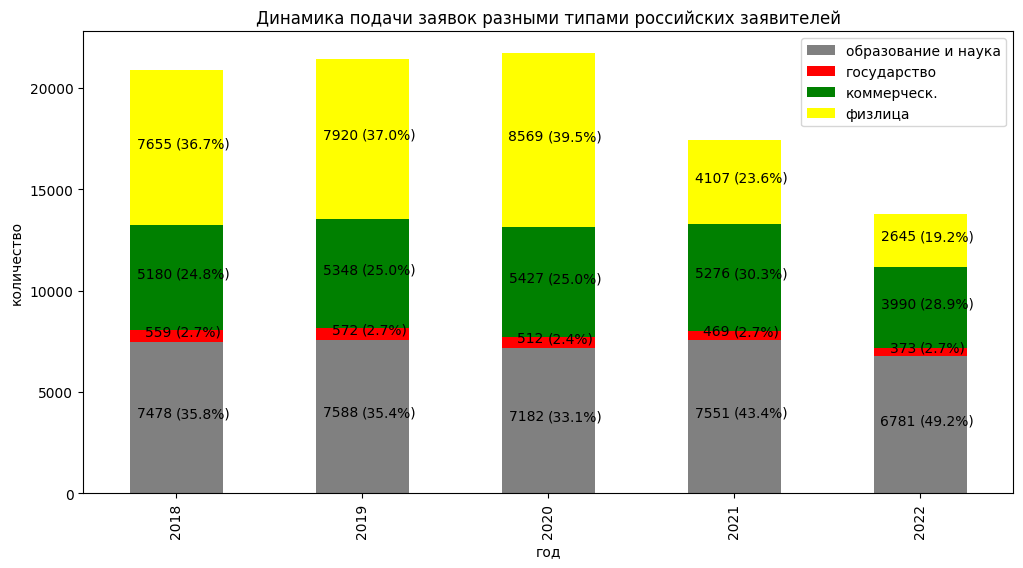

In [ ]:
app_types_df.plot(x='years', y=types[1:], kind='bar', figsize=(12, 6), xlabel='год', ylabel='количество', title='Динамика подачи заявок разными типами российских заявителей', color = ['grey', 'red', 'green', 'yellow'], stacked=True)
print(app_types_df)
for i in range(len(years)):
  total = 0
  for value in types[1:]:
    plt.text(i, app_types_df[value].loc[i]*0.5 + total, str(app_types_df[value].loc[i])+' ', ha = 'right')
    plt.text(i, app_types_df[value].loc[i]*0.5 + total, '('+str(round(persent_app_to_total_app_df[value].loc[i], 1))+'%)', ha = 'left')
    total += app_types_df[value].loc[i]
plt.show()

In [ ]:
app_types_np = app_types_df[types[1:]].to_numpy()

In [ ]:
# типы патентообладателей
types = ['no_data', 'education', 'government', 'legal', 'individual']
types = ['нет данных', 'образование и наука', 'государство', 'коммерческ.', 'физлица']
patent_types_data = []
for year in data_voc_ru.keys():
  patent_df = data_voc_ru[year][data_voc_ru[year]['patent number'] != 'no_data']
  print(year)
  year_data = app_categories(patent_df['applicant'].values[:], (patent_df['authors'].values[:]))
  print('данные по категориям', year_data[0])
  print('количество авторов=заявителей', year_data[2])
  patent_types_data.append(year_data[0])
patents_types_df = pd.DataFrame(patent_types_data, columns=types)
patents_types_df['years'] = years
try:
  patents_types_df.drop(['нет данных'], axis=1, inplace=True)
except:
  nothing = 1

patent_types_np = patents_types_df[types[1:]].to_numpy()
persent_df = pd.DataFrame(patent_types_np/app_types_np, columns=[types[1:]])


2018
total documents 16132
данные по категориям [0, 7027, 525, 4740, 3840]
количество авторов=заявителей 3050
2019
total documents 16600
данные по категориям [0, 7222, 550, 4930, 3898]
количество авторов=заявителей 2978
2020
total documents 15597
данные по категориям [0, 6738, 473, 4931, 3455]
количество авторов=заявителей 2604
2021
total documents 15075
данные по категориям [0, 6994, 438, 4680, 2963]
количество авторов=заявителей 2187
2022
total documents 13033
данные по категориям [0, 6579, 363, 3787, 2304]
количество авторов=заявителей 1742


  образование и наука государство коммерческ.   физлица years
0            0.939690    0.939177    0.915058  0.501633  2018
1            0.951766    0.961538    0.921840  0.492172  2019
2            0.938179    0.923828    0.908605  0.403198  2020
3            0.926235    0.933902    0.887036  0.721451  2021
4            0.970211    0.973190    0.949123  0.871078  2022
   образование и наука  государство  коммерческ.  физлица years
0                 7027          525         4740     3840  2018
1                 7222          550         4930     3898  2019
2                 6738          473         4931     3455  2020
3                 6994          438         4680     2963  2021
4                 6579          363         3787     2304  2022


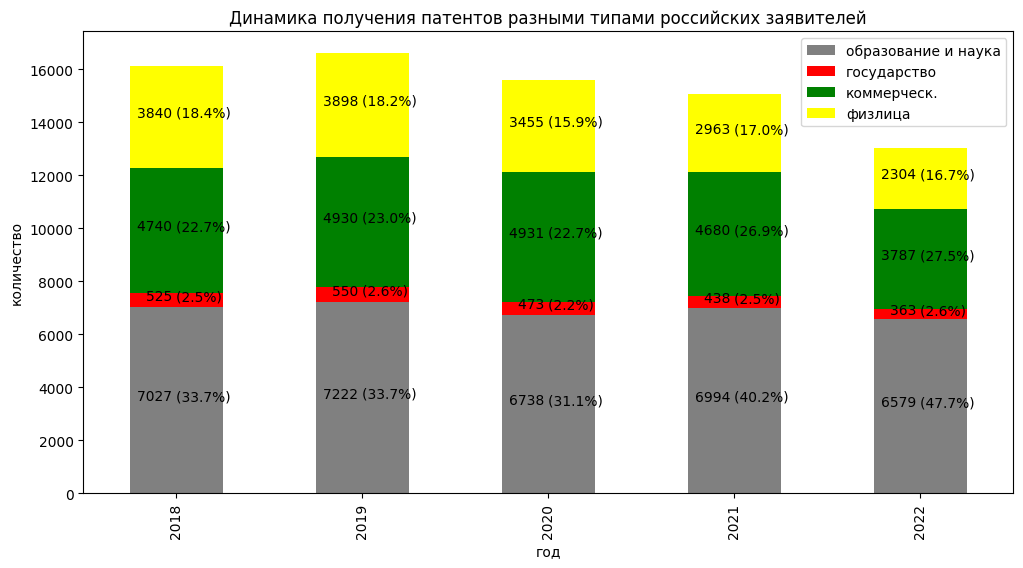

In [ ]:

persent_df['years'] = years

print(persent_df)
print(patents_types_df)
patents_types_df.plot(x='years', y=types[1:], kind='bar', figsize=(12, 6), xlabel='год', ylabel='количество', title='Динамика получения патентов разными типами российских заявителей', color = ['grey', 'red', 'green', 'yellow'], stacked=True)

persent_patent_to_total_app = patents_types_df[['образование и наука',	'государство',	'коммерческ.',	'физлица'	]].to_numpy()/pd.DataFrame(ru_applicants).transpose().to_numpy()*100
persent_patent_to_total_app_df = pd.DataFrame(persent_patent_to_total_app, columns=['образование и наука',	'государство',	'коммерческ.',	'физлица'	])

for i in range(len(years)):
  # Aprint('i', i)
  total = 0
  for value in types[1:]:
    #print('value', value)
    #print(persent_df[value].loc[i].values[0])
    plt.text(i, patents_types_df[value].loc[i]*0.5 + total, str(patents_types_df[value].loc[i])+' ', ha = 'right')
    plt.text(i, patents_types_df[value].loc[i]*0.5 + total, '('+str(round(persent_patent_to_total_app_df[value].loc[i], 1))+'%) ', ha = 'left')
    #plt.text(i, patents_types_df[value].loc[i]*0.5 - 0 + total, ' (' + str(int(float(persent_patent_to_total_app_df[value].loc[i].values[0])*100))+"%)", ha = 'left')
    total += patents_types_df[value].loc[i]

plt.show()

2018
total documents 7907
данные по категориям [0, 2300, 253, 3411, 1943]
количество авторов=заявителей 1668
2019
total documents 9011
данные по категориям [0, 3140, 235, 3720, 1916]
количество авторов=заявителей 1623
2020
total documents 9247
данные по категориям [0, 3308, 214, 3824, 1901]
количество авторов=заявителей 1552
2021
total documents 10647
данные по категориям [0, 4545, 218, 3963, 1921]
количество авторов=заявителей 1536
2022
total documents 13011
данные по категориям [0, 6570, 363, 3777, 2301]
количество авторов=заявителей 1739
  образование и наука государство коммерческ.   физлица years
0            0.307569    0.452594    0.658494  0.253821  2018
1            0.413811    0.410839    0.695587  0.241919  2019
2            0.460596    0.417969    0.704625  0.221846  2020
3            0.601907    0.464819    0.751137  0.467738  2021
4            0.968884    0.973190    0.946617  0.869943  2022
   образование и наука  государство  коммерческ.  физлица years
0                

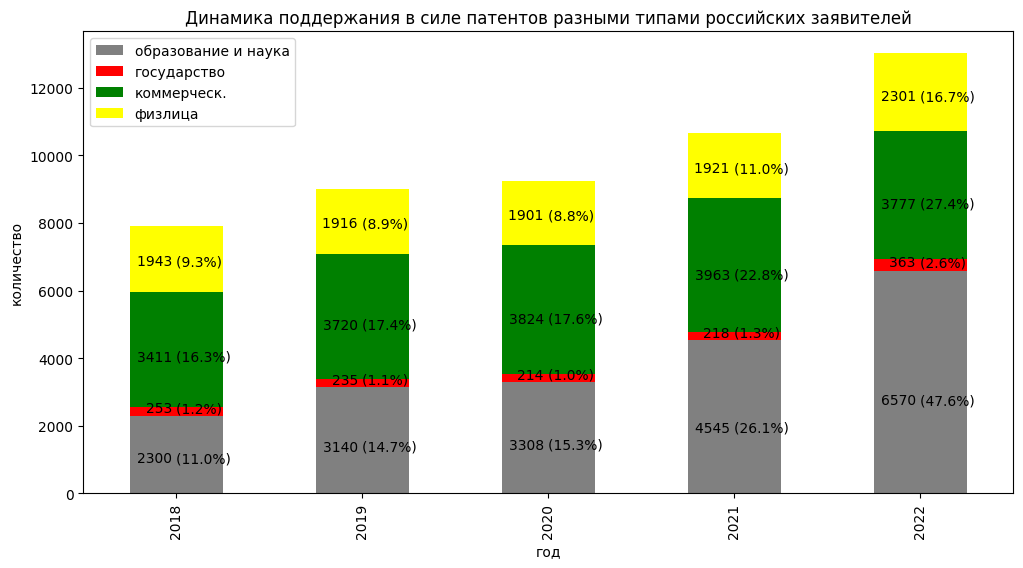

In [ ]:
# динамика поддержания патентов в силе
# типы патентообладателей
types = ['no_data', 'education', 'government', 'legal', 'individual']
types = ['нет данных', 'образование и наука', 'государство', 'коммерческ.', 'физлица']
patent_types_data = []
for year in data_voc_ru.keys():
  patent_df = data_voc_ru[year][(data_voc_ru[year]['patent number'] != 'no_data') & (data_voc_ru[year]['status_number'] == 1)]
  print(year)
  year_data = app_categories(patent_df['applicant'].values[:], (patent_df['authors'].values[:]))
  print('данные по категориям', year_data[0])
  print('количество авторов=заявителей', year_data[2])
  patent_types_data.append(year_data[0])
patents_types_df = pd.DataFrame(patent_types_data, columns=types)
patents_types_df['years'] = years
try:
  patents_types_df.drop(['нет данных'], axis=1, inplace=True)
except:
  nothing = 1

patent_types_np = patents_types_df[types[1:]].to_numpy()
persent_df = pd.DataFrame(patent_types_np/app_types_np, columns=[types[1:]])

persent_active_patent_to_total_app = patents_types_df[['образование и наука',	'государство',	'коммерческ.',	'физлица'	]].to_numpy()/pd.DataFrame(ru_applicants).transpose().to_numpy()*100
persent_active_patent_to_total_app_df = pd.DataFrame(persent_active_patent_to_total_app, columns=['образование и наука',	'государство',	'коммерческ.',	'физлица'	])

persent_df['years'] = years

print(persent_df)
print(patents_types_df)
patents_types_df.plot(x='years', y=types[1:], kind='bar', figsize=(12, 6), xlabel='год', ylabel='количество', title='Динамика поддержания в силе патентов разными типами российских заявителей', color = ['grey', 'red', 'green', 'yellow'], stacked=True)

for i in range(len(years)):
  # Aprint('i', i)
  total = 0
  for value in types[1:]:
    #print('value', value)
    #print(persent_df[value].loc[i].values[0])
    plt.text(i, patents_types_df[value].loc[i]*0.4 + total, str(patents_types_df[value].loc[i]) + ' ', ha = 'right')
    plt.text(i, patents_types_df[value].loc[i]*0.4 - 0 + total, '('+str(round(persent_active_patent_to_total_app_df[value].loc[i], 1))+'%) ', ha = 'left')
    total += patents_types_df[value].loc[i]

plt.show()

# 2. Часть, связанная с лицензиями

## defs

In [ ]:
def owner_license_type(license_data_unique):
  owner_types = ['education', 'government', 'legal', 'physic']
  licens_types = license_data_unique['license type details'].value_counts().index.to_list()
  sub_data1 = pd.DataFrame()
  sub_data2 = pd.DataFrame()
  license_owner_types = {}

  for owner_type in owner_types:
    try:
      sub_data1 = license_data_unique[license_data_unique[owner_type]==1]
    except:
      sub_data1 = pd.DataFrame()
    license_data = []
    for licens_type in licens_types:
      try:
        sub_data2 = sub_data1[sub_data1['license type details']==licens_type]
      except:
        sub_data2 = pd.DataFrame()
      license_data.append(len(sub_data2))
    license_owner_types[owner_type] = license_data
  #print('распределение по типам заявителей и типам распоряжений', license_owner_types)
  return license_owner_types, licens_types

In [ ]:
def ru_not_ru(data):
  # количество RU-не RU распорядителей
  license_data_unique_ru = data[data['owner'].str.contains('RU')]
  ru_license = len(license_data_unique_ru)
  # количество заруб распорядителей
  not_ru_license = len(data) - len(license_data_unique_ru)
  print('общее количество распоряжений', len(data),
        '\nколичество распоряжений у Заруб распорядителей', len(data) - len(license_data_unique_ru))
  print('количество распоряжений у RU распорядителей', len(license_data_unique_ru))

  ru_patents = len(set(license_data_unique_ru['patent number']))
  not_ru_patents = len(set(data['patent number'])) - len(set(license_data_unique_ru['patent number']))
  print('общее количество патентов', len(set(data['patent number'])),
  '\nколичество патентов у Заруб распорядителей',
        len(set(data['patent number'])) - len(set(license_data_unique_ru['patent number'])))
  print('количество патентов у RU распорядителей', len(set(license_data_unique_ru['patent number'])))

  # зарубежные распорядители наименования
  foreign_owners = []
  for i in data['owner'].value_counts().index:
    if ('RU') not in i:
      foreign_owners.append(i)
  print('foreign_owners', foreign_owners)

  foreign_licenses_title = []
  foreign_licenses_patent_number = []
  not_ru_numbers = []
  for i in foreign_owners:
    not_ru_numbers.append(len(data[data['owner']==i]))
    #print('foreign_owners title', (data[data['owner']==i]['title'].values.tolist()))
    foreign_licenses_title += data[data['owner']==i]['title'].values.tolist()
    foreign_licenses_patent_number += data[data['owner']==i]['patent number'].values.tolist()
  print('количеста распоряжений по правообладателям', not_ru_numbers)
  #print('названия патентов заруб распорядителей', foreign_licenses_title)
  #print('номера патентов зарубежных распорядителей', foreign_licenses_patent_number)
  print('количество патентов зарубежных распорядителей', len(set(foreign_licenses_patent_number)))
  return ru_license, not_ru_license, ru_patents, not_ru_patents

In [ ]:
def app_categories_2(column):
  '''
  column - column from dataframe for dividing into categories
  return vocabulary which comprise 4 categories and number of applicants in the categories
  '''
  edu_group = []
  leg_group = []
  phy_group = []
  gov_group = []

  grouped_cat = []
  applicants = column # column
  print('total documents', len(applicants))
  edu = 0
  gov = 0
  leg = 0
  phy = 0
  no_data = 0
  appl = []
  app_edu = []
  app_gov = []
  app_leg = []
  app_phy = []


  education = ['бразован', 'нститут', 'ниверс', 'ЮНИВЕРСИТИ', 'юниверсити', 'УНИВЕР', 'ИНСТИТЬЮТ', 'ИНСТИТУТ', 'ЮНИВЕРСИТЕ', 'ФГБОУ', 'ИМАШ РАН', 'ИВС РАН', 'учреждение науки', 'аучный центр', 'научно-производственный центр',
               'исследовательский центр', 'Научно-учебный центр']
  government = ['осударственн', 'министерство', 'Российская Федерация', 'государственное бюджетное учреждение', 'ФГБНУ', 'ойсковая часть', 'азенное учреждение', 'ФБУ', 'ФГУП',
                'Министерство обороны', 'Росконгресс']
  legal = ['ООО', 'бщество', 'ЛТД.', 'ЛИМИТЕД', 'КОРПОРЕЙШН', 'ИНК.', 'Лимитед', 'ИНКОРПОРЕЙТЕД', 'ГМБХ', 'КОНИНКЛЕЙКЕ', 'ИНТЕРНЭШНЛ', 'ФРАНС', 'ЛЛС', 'КАЙСЯ', 'С.П.А', 'С.А.', 'ЛТД',
          ' АГ', 'СИМЕНС', 'КОМПАНИ', 'Лтд', 'КОРПОРЭЙШН', 'ЭЛЕКТРОНИКС', 'Компани', 'ОБЩЕСТВО', 'ЭлЭлСи', 'ХОЛДИНГ', 'БАСФ', 'ООО', 'ГмбХ', 'Инк.', 'А/С', 'АКЦИЕНГЕЗЕЛЛЬШАФТ',
          'АКЦИЕНГЕЗЕЛЬШАФТ', 'С.Р.Л.', ' АБ ', 'ЛЛК', 'Акциенгезельшафт', ' СПА ', 'СОЛЮШНС', 'ЗАО', 'ПАО', 'АКТИЕНГЕЗЕЛЛЬШАФТ', 'Текнолоджиз',
          'олюшн', 'ЭлЭЛСи', 'орпорейшн', 'ГРУП', 'ДиЭмСиСи', '(ПАБЛ)', 'ЭЛЕКТРИК', 'ТЕКНОЛО', 'АО ', 'БОЛАГЕТ', 'САФРАН', ' ОЙ ', 'ОЮЙ', 'ОЙЙ',
          ' САС ', ' СА ', ' АС ', 'СОЛЮШН', ' ИНК ', ' НВ ', 'АКТИЕБОЛАГ', 'ГОБЭН', 'ИНТЕРНЕЙШНЛ', 'ЛЛЦ', 'СЕРВИС', 'ФАРМА', 'ЭЛЭЛСИ', 'АССОЦИАЦИЯ РАЗВИТИЯ ФИНАНСОВЫХ ТЕХНОЛОГИЙ',
           'убличное акционерно', 'OOO', 'кционерн']
  physic = [' оглы', 'анович ', 'СЕРГЕ', 'ВЛАДИМИР', 'ЕВИЧ ', 'ОВИЧ ', 'Чон-Ын', 'ЦЗИНЬ, ГЭ', 'Цой Валентин']


  others = []
  for applicant in applicants[:]:
    phy_trigger = 0
    edu_trigger = 0
    gov_trigger = 0
    leg_trigger = 0
    #print('\n\n', applicant)
    trigger = 0

    for l in legal:
      if l in applicant:
        leg += 1
        leg_trigger = 1
        #print('education')
        trigger = 1
        app_leg.append(applicant)
        break

    if not trigger:
      for e in education:
        if e in applicant:
          edu += 1
          edu_trigger = 1
          #print('education')
          trigger = 1
          app_edu.append(applicant)
          break

    if not trigger:
      for g in government:
        if g in applicant:
          gov += 1
          gov_trigger = 1
          #print('government')
          trigger = 1
          app_gov.append(applicant)
          break

    if not trigger:
      for l in legal:
        if l in applicant:
          leg += 1
          leg_trigger = 1
          #print('legal')
          trigger = 1
          app_leg.append(applicant)
          break

    if not trigger:
      for p in physic:
        if p in applicant:
          phy += 1
          phy_trigger = 1
          #print('physic', applicant)
          trigger = 1
          app_phy.append(applicant)
          break

    if not trigger:
      if (len(re.findall(r'\s', applicant.split(' (')[0]))) == 0 or len(re.findall(r'\.', applicant.split('(')[0])) > 0 or len(re.findall(r'\s', applicant.split(' (')[0])) > 3:
        #print()
        leg += 1
        leg_trigger = 1
        app_leg.append(applicant)
        #print('legal')
        trigger = 1

      #print(applicant)
      if not trigger:
        # БОЛЬШАЯмаленькие пробел БОЛЬШАЯмаленькие пробел БОЛЬШАЯмаленькие
        name_pattern = r'[А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+ [А-ЯЁ][а-яё]+'
        if len(re.findall(name_pattern, applicant)) != 0:
          phy += 1
          phy_trigger = 1
          app_phy.append(applicant)
          #print('physic', applicant)
          trigger = 1

      if not trigger:
        # БОЛЬШАЯ ФАМИЛИЯ маленькое имя
        name_pattern = r'[А-ЯЁ]+ [А-ЯЁ][а-яё]+'
        if len(re.findall(name_pattern, applicant)) != 0:
          phy += 1
          phy_trig = 1
          #print('physic', applicant)
          app_phy.append(applicant)
          trigger = 1

        # всякие исключения
        if not trigger:
          if 'Мешенгиссер Юрий' in applicant or 'Газимиев Магомед-Салах Алхазурович' in applicant or 'НАСЫРОВА НАДЕЖДА ИГОРЕВНА' in applicant:
            phy += 1
            phy_trig = 1
            #print('physic', applicant)
            app_phy.append(applicant)
            trigger = 1


    if trigger == 0:
      others.append(applicant)

    if edu_trigger:
      edu_group.append(1)
    else:
      edu_group.append(0)
    if gov_trigger:
      gov_group.append(1)
    else:
      gov_group.append(0)
    if phy_trigger:
      phy_group.append(1)
    else:
      phy_group.append(0)
    if leg_trigger:
      leg_group.append(1)
    else:
      leg_group.append(0)



  #print(edu_group)
  #print(gov_group)
  #print(phy_group)
  #print(leg_group)
  #print('total', edu + gov + leg + phy)
  data = {}
  values = [edu, gov, leg, phy]
  types = ['education', 'government', 'legal', 'physic']
  for value, key in zip(values, types):
    data[key] = value
  print('not grouped - shall be []', others)

  return values, edu_group, gov_group, leg_group, phy_group

## code

In [ ]:
file_addresses = ['/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2018INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2019INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2020INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2021INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/2022INV_patent_parsed_data.txt']

file_addresses = ['/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2018INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2019INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2020INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2021INV_patent_parsed_data.txt',
                 '/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/inv2/2022INV_patent_parsed_data.txt']

In [ ]:
licensed_patents_voc = {}
for year in years:
  df = data_voc_ru[year]
  df = df.loc[df['alienation']!='no_data']
  #df = df.loc[(df['alienation']!='0') | (df['license']!='0') | (df['pledge']!='0')] # здесь учитываю залог
  df = df.loc[(df['alienation']!='0') | (df['license']!='0')] # здесь только лицензионный договор или договор отчуждения
  print(year, len(df))
  licensed_patents_voc[year] = df

2018 1193
2019 1100
2020 692
2021 402
2022 167


In [ ]:
# проверка, все ли распоряжения попали в данные для обработки
patent_type = 'INV' # INV or UM
license_data_df = pd.DataFrame()
license_data_voc = {}

header = ['patent number', 'title', 'patent url', 'owner', 'ipc', 'license type', 'license number date', 'licensor', 'licensee', 'license type details', 'license conditions', 'address']
for year in years[:]:
  print(year)
  license_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Патентование/парсинг и анализ заявок на ИЗ и ПМ/data/license/' + str(year) + patent_type + '_licenses_info.csv', sep='\t', encoding='utf8', header=None)
  license_data_df = license_data_df[[columns for columns in range(1, 13)]]
  license_data_df.columns = header
  license_data_df = license_data_df.drop(index= 0)
  license_data_df = license_data_df[license_data_df['patent number'] != 'h']
  print(len(set(licensed_patents_voc[year]['patent number'].astype(int))))
  print(len(set(license_data_df['patent number'])))
  print((set(licensed_patents_voc[year]['patent number'].astype(int))) - (set(license_data_df['patent number'].astype(int))))
  print(len((set(licensed_patents_voc[year]['patent number'].astype(int))) - (set(license_data_df['patent number'].astype(int)))))
  print('====================================')
  license_data_voc[year] = license_data_df


2018
1192
1547
{2685061, 2674123, 2677142, 2677146, 2691645}
5
2019
1100
1422
{2719078}
1
2020
692
803
set()
0
2021
402
442
{2769770}
1
2022
167
171
set()
0


In [ ]:
0/0

ZeroDivisionError: ignored

In [ ]:
# убираю лишнюю информацию, привожу к более удобному виду
total = np.array([])
unique = np.array([])
open_lic = np.array([])
license_data_final_voc = {}

for year in years[:]:
  print('year', year)
  license_data = license_data_voc[year]
  total = np.append(total, len(license_data['patent number']))
  unique = np.append(unique, len(set(license_data['patent number'])))

  # licensee correction
  new_licensee = []
  for i in license_data.licensee:
    #print(i.split('\n')[0])
    new_licensee.append(i.split('\n')[0])
  license_data.licensee = new_licensee

  # license_type_details correction
  new_license_type_details = []
  for i in license_data['license type details']:
    #print(i.split('\n')[0])
    new_license_type_details.append(i.split('\n')[0])
  license_data.license_type_details = new_license_type_details

  # open license removing
  open_lic = np.append(open_lic, len(license_data[license_data['license type'] == 'Открытая лицензия']))
  print('количество открытых лицензий', open_lic)
  license_data = license_data[license_data['license type'] != 'Открытая лицензия']

  ## save unique only
  # part 1 removing copies with the same contract number
  license_data_dupl = license_data[license_data.duplicated(subset=['patent number', 'license number date'])]
  print('number of duplicates, где повторяются распоряжения и изменения', len(license_data_dupl))
  license_data_unique = license_data.drop_duplicates(subset=['patent number', 'license number date'], keep='first', inplace=False, ignore_index=False)
  # part 2 removing alienations between the same participants
  license_data_dupl2 = license_data_unique[(license_data_unique.duplicated(subset=['patent number', 'owner', 'license type', 'licensor', 'licensee'])&(license_data_unique['license type details']=='Договор отчуждения'))]
  print('number of duplicates2, где несколько раз фиксируется идентичное отчуждение', len(license_data_dupl2))
  license_data_unique = license_data_unique.drop_duplicates(subset=['patent number', 'owner', 'license type', 'licensor', 'licensee'], keep='first', inplace=False, ignore_index=False)

  # change in registration details removing
  #print('changes\n', license_data_unique[license_data_unique['license type'] == 'QZ9K Государственная регистрация изменений, касающихся предоставления права использования по договору'])
  print('количество зарегистрированных изменений, попавших в данные', len(license_data_unique[license_data_unique['license type'] == 'QZ9K Государственная регистрация изменений, касающихся предоставления права использования по договору']))
  license_data_unique = license_data_unique[license_data_unique['license type'] != 'QZ9K Государственная регистрация изменений, касающихся предоставления права использования по договору']

  # замена сходных терминов одним
  license_data_unique.loc[license_data_unique['license type details']=='о последующем залоге исключительного права', ['license type details']] = 'о залоге исключительного права'
  license_data_unique.loc[license_data_unique['license type details']=='об отчуждении исключительного права', ['license type details']] = 'Договор отчуждения'

  print('number of unique', len(license_data_unique), ', number of RU unique', len(license_data_unique[license_data_unique['owner'].str.contains('RU')]))
  license_data_final_voc[year] = license_data_unique

  print('общее количество уникальных распоряжений', len(license_data_unique['patent number']),
        ', количество патентов с раcпоряжениями', len(set(license_data_unique['patent number'])),
        ', количество RU патентов с раcпоряжениями', len(set(license_data_unique[license_data_unique['owner'].str.contains('RU')]['patent number'])),
        ', difference', len(license_data_unique['patent number']) - len(set(license_data_unique['patent number'])))

  print('==============================\n\n')

In [ ]:
# убираю дату осуществления распоряжения

for year in license_data_final_voc.keys():
  #print(license_data_voc[year]['license type details'])
  license_data_final_voc[year]['license type details'] = (license_data_final_voc[year]['license type details'].apply(lambda x: x.split('Дата')[0].strip()))

  print(license_data_final_voc[year]['license type details'].value_counts())

In [ ]:
main_data_df = pd.DataFrame(np.transpose([total, unique, open_lic]), index=years, columns=['общее количество распоряжений', 'количество патентов с распоряжениями', 'количество открытых лицензий'])

ax = main_data_df.plot(kind='bar') # ADD NUMBERS
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

In [ ]:
data_line = []
license_data_voc_ru = {}
for year in license_data_final_voc.keys():
  print(year)
  ru_not_ru_data = ru_not_ru(license_data_final_voc[year])
  print('количество рос-зарубежн распорядителей', ru_not_ru_data)
  data_line.append([ru_not_ru_data[0], ru_not_ru_data[2], ru_not_ru_data[1], ru_not_ru_data[3]])
  print()
  license_data_final_voc[year] = license_data_final_voc[year][license_data_final_voc[year]['owner'].str.contains('RU')]
#df = pd.DataFrame(data_line, columns=years)
print(data_line)
df_ru_not_ru = pd.DataFrame(data_line, index=years, columns=['ru_license', 'ru_patents', 'not_ru_license', 'not_ru_patents'])
ax = df_ru_not_ru.plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

In [ ]:
license_data_final_voc[year].columns

In [ ]:
# считаю именно !!!!!!!!распоряжения!!!!!!!!!!!!!!
data_line = []
types_visualisation = ['образование и наука', 'государство', 'коммерческ.', 'физлица']
types = ['education', 'government', 'legal', 'physic']
for year in license_data_final_voc.keys():
  print(year)
  # смотрю распределение распорядителей по 4 категориям
  groups_data = app_categories(license_data_final_voc[year]['owner'], license_data_final_voc[year]['title'])
  #print(groups_data)
  print(types_visualisation, groups_data[0], 'сумма', sum(groups_data[0]))
  data_line.append(groups_data[0][1:])
  try:
    license_data_final_voc[year].insert(len(license_data_final_voc[year].columns), types[0], groups_data[1])
    license_data_final_voc[year].insert(len(license_data_final_voc[year].columns), types[1], groups_data[2])
    license_data_final_voc[year].insert(len(license_data_final_voc[year].columns), types[2], groups_data[3])
    license_data_final_voc[year].insert(len(license_data_final_voc[year].columns), types[3], groups_data[4])
  except:
    print('already inserted')
df_app_types = (pd.DataFrame(data_line, columns=types_visualisation, index=years))
df_app_types['years'] = years

persent_licenses_to_total_app = df_app_types[['образование и наука',	'государство',	'коммерческ.',	'физлица'	]].to_numpy()/pd.DataFrame(ru_applicants).transpose().to_numpy()*100
persent_licenses_to_total_app_df = pd.DataFrame(persent_licenses_to_total_app, columns=['образование и наука',	'государство',	'коммерческ.',	'физлица'	])

ax = df_app_types.plot(x='years', y=types_visualisation, kind='bar', stacked=True, title='Динамика распоряжений правами российскими патентообладателями', color=['grey', 'red', 'green', 'yellow'], figsize=(12, 6), xlabel='год', ylabel='количество', table=False)
#ax = applicants_df.plot(x='год', y=columns, kind='bar', stacked=True, title='Динамика подачи RU-(не RU) заявителями', color=['green', 'red', 'grey'], figsize=(10, 6), xlabel='\nгод', table=False)

for i in range(len(years)-1):
  total = 0
  for value in types_visualisation:
    plt.text(i, df_app_types[value].iloc[i]*0.4 + total, '  '+str(df_app_types[value].iloc[i]) + '  ', ha = 'right')
    plt.text(i, df_app_types[value].iloc[i]*0.4 + total, '(' + str(round(float(persent_licenses_to_total_app_df[value].iloc[i]), 1))+"%)  ", ha = 'left')
    total += df_app_types[value].iloc[i]

for i in range(len(years))[-1:]:
  total = 0
  for value in types_visualisation:
    plt.text(i, df_app_types[value].iloc[i]*0 +240 + total, '  '+str(df_app_types[value].iloc[i])+'  ', ha = 'right')
    plt.text(i, df_app_types[value].iloc[i]*0 +240 + total, '(' + str(round(float(persent_licenses_to_total_app_df[value].iloc[i]), 1))+"%)  ", ha = 'left')
    total += 50
plt.show()

In [ ]:
persent_licenses_to_total_app_df

In [ ]:
# считаю только !!!!!!!!!патенты!!!!!!!!!, то есть оставляю только одно распоряжение

data_line = []
types_visualisation = ['образование и наука', 'государство', 'коммерческ.', 'физлица']
types = ['education', 'government', 'legal', 'physic']
for year in license_data_final_voc.keys():
  print(year)
  # смотрю распределение распорядителей по 4 категориям
  license_data_unique_patents[year] = license_data_final_voc[year].drop_duplicates(subset=['patent number'], keep='first', inplace=False, ignore_index=False)
  groups_data = app_categories(license_data_unique_patents[year]['owner'], license_data_unique_patents[year]['title'])
  #print(groups_data)
  print(types_visualisation, groups_data[0], 'сумма', sum(groups_data[0]))
  data_line.append(groups_data[0][1:])
  try:
    license_data_unique_patents[year].insert(len(license_data_unique_patents[year].columns), types[0], groups_data[1])
    license_data_unique_patents[year].insert(len(license_data_unique_patents[year].columns), types[1], groups_data[2])
    license_data_unique_patents[year].insert(len(license_data_unique_patents[year].columns), types[2], groups_data[3])
    license_data_unique_patents[year].insert(len(license_data_unique_patents[year].columns), types[3], groups_data[4])
  except:
    print('already inserted')
df_app_types = (pd.DataFrame(data_line, columns=types_visualisation, index=years))
df_app_types['years'] = years

persent_licenses_to_total_app = df_app_types[['образование и наука',	'государство',	'коммерческ.',	'физлица'	]].to_numpy()/pd.DataFrame(ru_applicants).transpose().to_numpy()*100
persent_licenses_to_total_app_df = pd.DataFrame(persent_licenses_to_total_app, columns=['образование и наука',	'государство',	'коммерческ.',	'физлица'	])

ax = df_app_types.plot(x='years', y=types_visualisation, kind='bar', stacked=True, title='Динамика распоряжений правами российскими патентообладателями', color=['grey', 'red', 'green', 'yellow'], figsize=(12, 6), xlabel='год', ylabel='количество', table=False)
#ax = applicants_df.plot(x='год', y=columns, kind='bar', stacked=True, title='Динамика подачи RU-(не RU) заявителями', color=['green', 'red', 'grey'], figsize=(10, 6), xlabel='\nгод', table=False)

for i in range(len(years)-1):
  total = 0
  for value in types_visualisation:
    plt.text(i, df_app_types[value].iloc[i]*0.4 + total, '  '+str(df_app_types[value].iloc[i]) + '  ', ha = 'right')
    plt.text(i, df_app_types[value].iloc[i]*0.4 + total, '(' + str(round(float(persent_licenses_to_total_app_df[value].iloc[i]), 1))+"%)  ", ha = 'left')
    total += df_app_types[value].iloc[i]

for i in range(len(years))[-1:]:
  total = 0
  for value in types_visualisation:
    plt.text(i, df_app_types[value].iloc[i]*0 +200 + total, '  '+str(df_app_types[value].iloc[i])+'  ', ha = 'right')
    plt.text(i, df_app_types[value].iloc[i]*0 +200 + total, '(' + str(round(float(persent_licenses_to_total_app_df[value].iloc[i]), 1))+"%)  ", ha = 'left')
    total += 50
plt.show()

In [ ]:
stop 0/0

In [ ]:
types = ['no_data', 'education', 'government', 'legal', 'individual']
types = ['нет данных', 'образование и наука', 'государство', 'коммерческ.', 'физлица']
colors = {'нет данных':'grey',
          'образование и наука':'red',
          'государство':'orange',
          'коммерческ.':'green',
          'физлица':'blue'}
data_line = []
for year in data_voc_ru.keys():
  print(year)
  # смотрю распределение распорядителей по 4 категориям
  groups_data = app_categories(data_voc_ru[year]['applicant'], data_voc_ru[year]['authors'])
  #print(data_voc_ru[year]['applicant'])
  #print('groups_data', groups_data[1])
  print('education', 'government', 'legal', 'physic', groups_data[0], 'сумма', sum(groups_data[0]))
  data_line.append(groups_data[0])
  try:
    data_voc_ru[year].insert(len(data_voc_ru[year].columns), 'education', groups_data[1])
    data_voc_ru[year].insert(len(data_voc_ru[year].columns), 'government', groups_data[2])
    data_voc_ru[year].insert(len(data_voc_ru[year].columns), 'physic', groups_data[3])
    data_voc_ru[year].insert(len(data_voc_ru[year].columns), 'legal', groups_data[4])
  except:
    print('already inserted')
df_app_types = (pd.DataFrame(data_line, columns=['no_data', 'education', 'government', 'legal', 'individual'], index=years))
#df_app_types.plot(kind='bar', title='Распределение распоряжений по типам правообладателей')
ax = df_app_types.plot(kind='bar', figsize=(10, 7))
for i in range(len('types')):
  ax.bar_label(ax.containers[i])



In [ ]:
data_voc_ru[year].columns

In [ ]:
# правообладатели действующих патентов
types = ['no_data', 'education', 'government', 'legal', 'individual']
types = ['нет данных', 'образование и наука', 'государство', 'коммерческ.', 'физлица']
data_line = []
for year in data_voc.keys():
  print(year)
  # смотрю распределение распорядителей по 4 категориям
  active_patents_df = data_voc[year][data_voc[year]['patent number'] != 'no_data']
  groups_data = app_categories(active_patents_df['applicant'], active_patents_df['authors'])
  #print(data_voc[year]['applicant'])
  #print('groups_data', groups_data[1])
  print('education', 'government', 'legal', 'physic', groups_data[0], 'сумма', sum(groups_data[0]))
  data_line.append(groups_data[0])
  try:
    data_voc[year].insert(len(data_voc[year].columns), 'education', groups_data[1])
    data_voc[year].insert(len(data_voc[year].columns), 'government', groups_data[2])
    data_voc[year].insert(len(data_voc[year].columns), 'physic', groups_data[3])
    data_voc[year].insert(len(data_voc[year].columns), 'legal', groups_data[4])
  except:
    #print('already inserted')
    nothing = 0
df_app_types = (pd.DataFrame(data_line, columns=['no_data', 'education', 'government', 'legal', 'individual'], index=years))
#df_app_types.plot(kind='bar', title='Распределение распоряжений по типам правообладателей')
ax = df_app_types.plot(kind='bar', figsize=(15, 7))
for i in range(len('types')):
  ax.bar_label(ax.containers[i])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0.)

# Давайте посмотрим наиболее активных авторов


In [ ]:
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(15, 10))
    # Показать изображение
    plt.imshow(wordcloud)
    # Без подписей на осях
    plt.axis("off")

In [ ]:
# функция сбора массива с названиями патентов автора

def author_titles_check(author_name):
  author_titles = ''
  print(author_name)
  author_patents = data_voc['2018'][data_voc['2018']['authors'].str.contains(author_name)]['claims'].tolist()
  #print(author_patents)
  for title in author_patents:
    #print(title.split(',')[0].replace('1. ',''))
    author_titles += title.split(',')[0].replace('1. ','').replace('\n', '') + ' '

  return author_titles.lower()

Курдюмов Владимир Иванович, Зыкин Евгений Сергеевич, Сутягин Сергей Алексеевич, Смирнов Алексей Сергеевич - представители профессорско-преподавательского состава, патенты принадлежат вузам, в которых они работали, но все они не действуют.



Отдельно следует выделить Бороненко Юрия Павловича, патенты под его авторством принадлежат Акционерному обществу "Научно-внедренческий центр "Вагоны" (АО "НВЦ "Вагоны"). Это коммерческое предприятие, а он его основатель. Почти все патенты действуют.
Вполне могу поверить, что 35 патентов на ПМ были получены с его творческим вкладом. Во-первых, он основатель НВЦ "Вагоны", во-вторых, он профессионал в этой области, в-третьих, он не выглядит, как "успешный" бизнесмен, а выглядит, как представитель творческой интеллигенции. Понятно, что субъективно, но вот фильм о нем: https://www.youtube.com/watch?app=desktop&v=7JPKBhPU7Wg

А ниже облако из названий патентов с его авторством.


In [ ]:
author_name = 'Бороненко Юрий Павлович'
STOPWORDS_RU = get_stop_words('russian')
text = author_titles_check(author_name)
print(text)
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

In [ ]:
# проверка действуют ли патенты автора
def author_status_check(author_name, year):
  author_status = []
  total = 0
  active = 0

  author_patents = data_voc[year][data_voc[year]['authors'].str.contains(author_name)]['status'].tolist()
  for status in author_patents:
    author_status.append(status.split('(')[0].strip())
  author_status_df = pd.DataFrame(author_status)
  print(author_status_df.value_counts())
  try:
    active1 = author_status_df.value_counts().loc[['действует']][0]
  except:
    active1 = 0
  try:
    active2 = author_status_df.value_counts().loc[['может прекратить свое действие']][0]
  except:
    active2 = 0
  active = active1 + active2
  non_active = sum(author_status_df.value_counts().values) - active
  authhor_data_line = [author_name, non_active, active]

  return authhor_data_line

# топ авторов
for app_df, year in zip(data_voc.values(), years):
  print('====================', year, '====================')
  author_patent_status_voc = {}
  all = []
  authors_status = []
  authors_column = app_df['authors']
  authors_column = authors_column
  for author in authors_column[:]:
    regex = r' \(\w\w\)'
    separated = re.split(regex, author)[:-1]
    for s in separated:
      all.append(s.replace(',', '').replace(';', ''))

  all_authors_df = pd.DataFrame(all)
  top_10_authors = all_authors_df.value_counts()[:10]

  counter = 1
  for author_name in top_10_authors.index:
    print('author_name', author_name)
    author_patent_status = author_status_check(author_name[0], year)
    authors_status.append(author_patent_status + [counter])
    counter += 1
  authors_df = pd.DataFrame(authors_status, columns=['name', 'Не действует', 'Действует', 'number'])

  names = ''
  for name, num in zip(authors_df['name'], authors_df['number']):
    names += str(num) + '. ' + name + '\n'
  authors_df.plot(x='number', y=[ 'Действует', 'Не действует'], kind='bar', figsize=(10, 5), stacked=True, color=['green', 'red'], xlabel=names,  grid=True, title = year)


In [ ]:
# active - not-active by years
columns_act_non_active = ['действует', 'может прекратить действие', 'может быть восстановлен', 'не действует']
active_non_active_data = []
for year in years:
  #print(len(data_voc[year]), year)
  active_patents = (len(data_voc[year][data_voc[year]['status'].str.contains('действует')])) - (len(data_voc[year][data_voc[year]['status'].str.contains('не действует')]))
  #print('active_patents', active_patents)
  semi_active_patents = (len(data_voc[year][data_voc[year]['status'].str.contains('может прекратить')]))
  #print('semi_active_patents', semi_active_patents)
  can_become_active_patents = (len(data_voc[year][data_voc[year]['status'].str.contains('может быть восстановлен')]))
  non_active_patents = (len(data_voc[year][data_voc[year]['status'].str.contains('не действует')]))
  #print('non_active_patents', non_active_patents)

  #print('can_become_active_patents', can_become_active_patents)
  no_data_patents = (len(data_voc[year][data_voc[year]['status'].str.contains('no_data')]))
  #print('no_data_patents', no_data_patents)
  print('sum', (active_patents+semi_active_patents+non_active_patents+can_become_active_patents + no_data_patents))
  active_non_active_data.append([active_patents, semi_active_patents, can_become_active_patents, non_active_patents])
active_non_active_df = pd.DataFrame(active_non_active_data, columns=columns_act_non_active, index=years)
active_non_active_df.plot(kind='bar', figsize=(10, 8), xlabel='год', color = ['green', 'blue', 'grey', 'red'])


In [ ]:
#data_voc['2018'][data_voc['2018']['status'].str.contains('не действует')]

In [ ]:
active_non_active_df

# На этом с анализом авторов закончу, посмотрим, что интересного можно найти у правообладателей

In [ ]:
app_status = []
all_data = pd.Series([0, 0, 0 , 0, 0])
for year in years:
  status_active = 0
  status_not_active = 0
  status_can_be_active = 0
  status_can_be_not_active = 0
  status_no_data = 0

  all_app_status = data_voc_ru[year]['status'].tolist()
  print('общее количество', len(all_app_status))
  for status in all_app_status[:]:
    #print(status)
    if status.split('(')[0].strip() == 'действует':
      status_active += 1
    elif status.split('(')[0].strip() == 'не действует':
      status_not_active += 1
    elif status.split('(')[0].strip() == 'может прекратить свое действие':
      status_can_be_not_active += 1
    elif status.split('(')[0].strip() == 'прекратил действие, но может быть восстановлен':
      status_can_be_active += 1
    else:
      status_no_data += 1
  app_status.append([status_active/len(all_app_status), status_not_active/len(all_app_status), status_can_be_not_active/len(all_app_status), status_can_be_active/len(all_app_status), status_no_data/len(all_app_status)])

app_status_df = pd.DataFrame(app_status, columns = ['действует', 'не действует', 'может прекратить свое действие', 'может быть восстановлен', 'no_data'])
app_status_df['years'] = years
print(app_status_df)
app_status_df.plot(x='years', y=['действует', 'не действует', 'может прекратить свое действие', 'может быть восстановлен', 'no_data'], kind='bar', figsize=(14, 7), xlabel='Years', stacked=True, grid=True)


all_data.dropna(inplace=True)
#print(all_data)

In [ ]:
app_df.info()

#патенты РЕЙЛ Кипр

In [ ]:
x_visual= x_visual.replace('Российская Федерация, от имени которой выступает Государственная корпорация по атомной энергии "Росатом" (Госкорпорация "Росатом")', 'Росатом')
x_visual= x_visual.replace('Федеральное государственное унитарное предприятие', 'ФГУП')
x_visual= x_visual.replace('Российский федеральный ядерный центр - Всероссийский научно-исследовательский институт экспериментальной физики" (ФГУП "РФЯЦ-ВНИИЭФ")', 'ФГУП "РФЯЦ-ВНИИЭФ"')
x_visual

In [ ]:
# проверка действуют ли патенты заявителя
def app_status_check(data_voc, app_name, year):
  applicant = ''
  original_app_name = app_name
  app_name = app_name.split('(')[0]
  app_patents = data_voc[year][data_voc[year]['applicant'].str.contains(app_name)]['status'].tolist()
  app_status_active = 0
  app_status_total = 0
  for status in app_patents:
    app_status_total += 1
    if status.split('(')[0].strip() == 'действует':
      app_status_active += 1
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Публичное акционерное общество', 'ПАО')
    original_app_name = original_app_name.replace('Общество с ограниченной ответственностью', 'ООО')
    original_app_name = original_app_name.replace('Федеральное государственное автономное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное автономное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное казенное военное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное автономное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное казенное военное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Федеральное государственное бюджетное научное учреждение', '')
    original_app_name = original_app_name.replace('ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ КАЗЕННОЕ ВОЕННОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ', '')
    original_app_name = original_app_name.replace('Федеральное государственное казенное военное образовательное учреждение высшего образования', '')
    original_app_name = original_app_name.replace('Министерства обороны Российской Федерации', '')
    original_app_name = original_app_name.replace('ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ', 'ООО')
    original_app_name = original_app_name.replace('Акционерное общество', 'АО')

  app_status_info = [original_app_name, app_status_total, app_status_total-app_status_active, app_status_active]
  return app_status_info

# топ заявителей
for app_df, year in zip(data_voc_ru.values(), years):
  print('====================', year, '====================')
  all = []
  app_column = app_df['applicant']
  top_10_app = app_column.value_counts()[0:10]
  #print(top_10_app, '\n')
  applicant_visualisation = []
  counter = [i for i in range(1, 11)]
  for app_name in (top_10_app.index):
    app_status_results = app_status_check(data_voc_ru, app_name, year)
    applicant_visualisation.append(app_status_results)
  applicant_visualisation_df = pd.DataFrame(applicant_visualisation, columns=['Патентообладатель', 'Всего', 'Не действуют', 'Дейсвуют']).sort_values(by='Всего', ascending=False)
  applicant_visualisation_df['№'] = counter
  x_visual = ''
  for num, app in zip(applicant_visualisation_df['№'], applicant_visualisation_df['Патентообладатель']):
    x_visual += (str(num) + ' ' + app + '\n')
  x_visual= x_visual.replace('Российская Федерация, от имени которой выступает Государственная корпорация по атомной энергии "Росатом" (Госкорпорация "Росатом")', 'Росатом')
  x_visual= x_visual.replace('Федеральное государственное унитарное предприятие', 'ФГУП')
  x_visual= x_visual.replace('Российский федеральный ядерный центр - Всероссийский научно-исследовательский институт экспериментальной физики" (ФГУП "РФЯЦ-ВНИИЭФ")', 'ФГУП "РФЯЦ-ВНИИЭФ"')
  x_visual= x_visual.replace('Федеральное государственное автономное учреждение "Национальный медицинский исследовательский центр "Межотраслевой научно-технический комплекс "Микрохирургия глаза" имени академика С.Н. Федорова" Министерства здравоохранения Российской Федерации ', 'МНТК «Микрохирургия глаза» им. акад. С.Н. Федорова')
  x_visual= x_visual.replace('Военный учебно-научный центр Военно-воздушных сил "Военно-воздушная академия имени профессора Н.Е. Жуковского и Ю.А. Гагарина', 'ВУНЦ ВВС "ВВА им. Н.Е. Жуковского и Ю.А. Гагарина"')
  x_visual= x_visual.replace('федеральное государственное бюджетное образовательное учреждение высшего образования "Волгоградский государственный аграрный университет" (ФГБОУ ВО Волгоградский ГАУ)', 'ФГБОУ ВО Волгоградский ГАУ')
  x_visual= x_visual.replace('федеральное государственное автономное образовательное учреждение высшего образования "Белгородский государственный национальный исследовательский университет" (НИУ "БелГУ")', 'НИУ "БелГУ"')
  x_visual= x_visual.replace('федеральное государственное бюджетное образовательное учреждение высшего образования «Санкт-Петербургский горный университет»', 'ФГБОУ ВО')
  print(x_visual)
  applicant_visualisation_df.plot(x='№', y=[ 'Дейсвуют', 'Не действуют'], kind='bar', figsize=(10, 5), xlabel=x_visual, stacked=True, grid=True, title = year, color=['green', 'red'])


Что мы видим. Патенты поддерживают в силе в основном только коммерческие организации. Вузы, которые являются лидерами по подаче, патенты за поддержание патентов в силе не платят, потому что они им не нужны.
Исключение - это последние года, потому что пошлину за поддержание в силе за первый год все платят.
Камаз стабильно в десятке лидеров и поддерживает свои патенты, посмотрим, что он защищает.

In [ ]:
# функция сбора массива с названиями патентов заявителя

def applicant_titles_check(applicant_name):
  applicant_titles = ''
  print(applicant_name)
  applicant_patents = app_df[app_df['applicant'].str.contains(applicant_name)]['claims'].tolist()
  #print(author_patents)
  for title in applicant_patents:
    #print(title.split(',')[0].replace('1. ',''))
    applicant_titles += title.split(',')[0].replace('1. ','').replace('\n', '') + ' '

  return applicant_titles.lower()

In [ ]:
# облако названий патентов Камаза

applicant_name = 'КАМАЗ'
STOPWORDS_RU = get_stop_words('russian')
text = applicant_titles_check(applicant_name)
print(text)
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

В последние два года как-то очень активно начал патентовать "Рузхиммаш", посмотрим, что он защищает.


In [ ]:
# облако слов названий патентов Рузхиммаша
applicant_name = 'Рузхиммаш'
STOPWORDS_RU = get_stop_words('russian')
text = applicant_titles_check(applicant_name)
print(text)
text = text.replace('вагона', 'вагон')
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)
plot_cloud(wordcloud)

Вопреки названию Рузхиммаш - крупнейший российский производитель грузового подвижного состава, и патенты его относятся к этой теме, конечно.
Посмотрим, что у этой компании с авторами.

In [ ]:
applicant_authors = app_df[app_df['applicant'].str.contains('Рузхиммаш')]['authors'].to_list()
all_authors = (','.join(applicant_authors).split(','))
print(pd.DataFrame(all_authors).value_counts()[:5])


Среди топ-5 авторов четверо первых технические специалисты. Про Лаврова гугл ничего не знает, что говорит о том, что он, скорее всего, тоже инженер.
Это грамотный подход к организации патентной деятельности, настоящие авторы должны быть указаны в патенте, хочется верить, что они также получают авторские вознаграждения за свой интеллектуальный труд.

Вернемся к первончальной задаче, посмотрим динамику отказов в выдаче патентов и динамику заявок, которые оказались отозванными (то есть их забросил заявитель).



In [ ]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['withdrawal date'] != 'no_data'])/total)
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of withdrawing applications by years')
plt.xlabel('year\n\n fig.1')
plt.show()

In [ ]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['refuse date'] != 'no_data'])/total)

print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of refusing applications by years')
plt.xlabel('year\n\n fig.1')
plt.show()



In [ ]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['grant date'] != 'no_data'])/1)
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of granting applications by years')
plt.title('Динамика выдачи патентов по годам')
plt.xlabel('год')
plt.ylabel('количество')
for x, y in zip(years, year_total):
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
plt.show()

Посмотрим как часто не выдают патенты год от года
Как видно из рисунка в 20,21 годах произошел резкий рост количества заявок, по которым по разным причинам не выдан патент.
Посмотрим на какие решения не выдавали патенты больше всего.

In [ ]:
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  year_total.append(len(data_voc[year][data_voc[year]['grant date'] == 'no_data'])/total)
  ipc_non_grant = (data_voc[year][data_voc[year]['grant date'] == 'no_data']['ipc'])
  ipc_non_grant.to_list()
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of non-granting applications by years')
plt.title('Динамика невыдачи патентов по годам')
plt.xlabel('year')
plt.xlabel('год')
plt.ylabel('persent')
plt.ylabel('процент')
for x, y in zip(years, year_total):
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
plt.show()

In [ ]:
# облака слов названий по годам
for year in data_voc.keys():
  claims_data = (';'.join(data_voc[year].claims.str.split(',')[0]))
  STOPWORDS_RU = get_stop_words('russian')
  text = claims_data
  print(text)
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  plot_cloud(wordcloud)

In [ ]:
# выдача патентов по МПК
new_df = pd.DataFrame()
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  total = len(data_voc[year])/100
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][data_voc[year]['grant date'] != 'no_data']['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:100]], axis=1)
ipc_stat_df.columns = years


ipc_stat_df.iloc[:8].plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'], xlabel='класс МПК')
print(new_df.transpose().iloc[:8])

In [ ]:
# выдача патентов по МПК
new_df = pd.DataFrame()
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  total = len(data_voc[year])/100
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][data_voc[year]['grant date'] != 'no_data']['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:3])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:100]], axis=1)
ipc_stat_df.columns = years

for i in ipc_stat_df.index:
  if 'G' in i[0]:
    new_df = pd.concat([new_df, ipc_stat_df.loc[i]], axis=1)
new_df.transpose().iloc[:8].plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'], xlabel='класс МПК')
print(new_df.transpose().iloc[:8])

In [ ]:
# выдача патентов по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  total = len(data_voc[year])/100
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][data_voc[year]['grant date'] != 'no_data']['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:2])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:50]], axis=1)
ipc_stat_df.columns = years
#ipc_stat_df = ipc_stat_df.drop(index='n')
ipc_stat_df.plot(kind='bar', color=['grey', 'black', 'red',  'green', 'blue'], figsize=(15, 7), xlabel='класс МПК', ylabel='количество', title='Динамика выдачи патентов по классам МПК')

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'], figsize=(15, 7), xlabel='класс МПК', ylabel='процент', title = 'Динамика выдачи патентов по классам МПК \n(нормализовано к общему числу патентов)')

In [ ]:
ipc_stat_df.iloc[[2, 3]]

In [ ]:
ipc_stat_df.iloc[[2, 3]].plot(kind='bar', color=['grey', 'black', 'red',  'green', 'blue'], xlabel='класс МПК', ylabel='количество', title='Динамика выдачи патентов по классам МПК')
ax = ipc_stat_df.iloc[[2, 3]].plot(kind='bar')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


Я не могу определить, по каким МПК отказы, так как нет данных по тем заявкам, по которым получен отказ, поэтому я могу посмотреть только по каким заявкам вдруг стали выдавать меньше патентов.

In [ ]:
# количество запросов по годам (сколько было 0, 1, 2, 3, 4 запроса)
for year in years:
  print(year, data_voc[year]['substantive exam amount'].value_counts())

In [ ]:
# факт запросов по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] != '0')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
try:
  ipc_stat_df = ipc_stat_df.drop(index='n')
except:
  nothing = 0

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

In [ ]:
# 1 запрос по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] == '1')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
try:
  ipc_stat_df = ipc_stat_df.drop(index='n')
except:
  nothing = 0

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

In [ ]:
# 2 запроса по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] == '2')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
try:
  ipc_stat_df = ipc_stat_df.drop(index='n')
except:
  nothing = 0

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

In [ ]:
# 3 запроса по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] == '3')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
try:
  ipc_stat_df = ipc_stat_df.drop(index='n')
except:
  nothing = 0

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

In [ ]:
# 4 запроса по существу по МПК
year_total = []
years = []
ipc_stat_df = pd.DataFrame()
for year in data_voc.keys():
  ipc_short = []
  years.append(year)
  for i in (','.join(data_voc[year][(data_voc[year]['substantive exam amount'] == '4')]['ipc'].to_list()).replace(' ','').split(',')):
    ipc_short.append(i[:1])
  ipc_stat_df = pd.concat([ipc_stat_df, pd.DataFrame(ipc_short).value_counts()[:30]], axis=1)
ipc_stat_df.columns = years
print(ipc_stat_df)
try:
  ipc_stat_df = ipc_stat_df.drop(index='n')
except:
  nothing = 0

# нормализация к общему числу патентов, поданных в год
ipc_stat_df_normalized = pd.DataFrame()
for column, total in zip(ipc_stat_df, app_per_year):
  ipc_stat_df_normalized = pd.concat([ipc_stat_df_normalized, (ipc_stat_df[column]/int(total)*100)], axis=1)
ipc_stat_df_normalized.plot(kind='bar', color = ['grey', 'black', 'red',  'green', 'blue'])

Виден какой-то огромный скачок в МПК А в 2021 году. При этом величина этого скачка в 0,5% от общего числа заявок, поэтому выявить причину достаточно тяжело

In [ ]:
year_total = []
years = []

for year in data_voc.keys():
  hard_patents = ''
  data = (data_voc[year][(data_voc[year]['ipc'].str[0] == 'F') & (data_voc[year]['substantive exam amount'] == '1')]['claims'])
  #print(data.tolist())
  for i in data.tolist():

    hard_patents = hard_patents + i.split(',')[0] + '; '


  STOPWORDS_RU = get_stop_words('russian')
  text = hard_patents
  print(text)
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False,
                        stopwords = STOPWORDS_RU).generate(text)
  #plot_cloud(wordcloud)



Количество заявок без запросов по существу

In [ ]:
data_voc[year].columns

In [ ]:
## ЗДЕСЬ НУЖНО УБРАТЬ ЗАЯВКИ, КОТОРЫЕ НЕ ПРОШЛИ ФОРМАЛЬНУЮ ЭКСПЕРТИЗУ ИЛИ УЧИТЫВАТЬ ТОЛЬКО ВЫДАННЫЕ ПАТЕНТЫ
year_total = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = len(data_voc[year])/100
  subs_ex = data_voc[year][(data_voc[year]['substantive exam amount'] == '0') & (data_voc[year]['formal exam'] != 'no_data')]
  year_total.append(len(subs_ex)/total)
  ipc_non_grant = (data_voc[year][data_voc[year]['grant date'] == 'no_data']['ipc'])
  ipc_non_grant.to_list()
print(year_total)
plt.bar(years, year_total, color='g')
plt.title('Dynamics of no substantive examinations by years')
plt.xlabel('year')
plt.ylabel('persent')
plt.show()

Количество заявок, по которым без запроса по существу выдают патент падает с 65 до 55%.

Посмотрим на количество запросов по существу

In [ ]:
all_exams = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = (len(data_voc[year]))/100
  exams_0 = len(data_voc[year][(data_voc[year]['substantive exam amount'] == '0') & (data_voc[year]['formal exam'] != 'no_data')])
  exams_1 = len(data_voc[year][(data_voc[year]['substantive exam amount'] == '1') & (data_voc[year]['formal exam'] != 'no_data')])
  exams_2 = len(data_voc[year][(data_voc[year]['substantive exam amount'] == '2') & (data_voc[year]['formal exam'] != 'no_data')])

  #print(exams_0, exams_1, exams_2)

  all_exams.append([
          exams_0/total,
          exams_1/total,
          exams_2/total
        ])
print(years)
exams_df = pd.DataFrame(all_exams, columns=['0 examinations', '1 examination', '2 examinations'], index=years)
print(exams_df)
exams_df.plot(kind='bar')


Посмотрим на динамику отказов и на динамику отзывов

In [ ]:
all_exams = []
years = []
for year in data_voc.keys():
  years.append(year)
  total = (len(data_voc[year]))/100
  refuse = len(data_voc[year][data_voc[year]['refuse date'] != 'no_data'])
  withdrawn = len(data_voc[year][data_voc[year]['withdrawal date'] != 'no_data'])
  grant = len(data_voc[year][data_voc[year]['grant date'] != 'no_data'])
  rest = len(data_voc[year][(data_voc[year]['grant date'] == 'no_data') & (data_voc[year]['withdrawal date'] == 'no_data') & (data_voc[year]['refuse date'] == 'no_data')])
  rest2 =(data_voc[year][(data_voc[year]['grant date'] == 'no_data') & (data_voc[year]['withdrawal date'] == 'no_data') & (data_voc[year]['refuse date'] == 'no_data')])
  all_exams.append([
          refuse/total,
          withdrawn/total,
          rest/total
        ])

exams_df = pd.DataFrame(all_exams, columns=['refusal number', 'withdrawal number',  'no data number'], index=years)
print(exams_df)
exams_df.plot(kind='bar')

# 8. Кто чаще получает отказы в этих МПК (физики, юрики, госучреждения)

Это можно сделать только для ИЗ, для ПМ такие заявки не публикуются

# 9. Кто несмотря ни на что получает патенты в этих МПК